<a href="https://colab.research.google.com/github/Nithya-Sri-Santhoshini-K-V-N-S/Task-1-Prediction-using-Supervised-ML/blob/main/Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRIP - THE SPARKS FOUNDATION**

**Data Science & Business Analytics Internship**

##Author: Nithya Sri Santhoshini K V N S

# **Task 1 - Prediction using Supervised ML**

To predict the percentage of marks of the students based on the no. of study hours.

**Import the required libraries**

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt  
%matplotlib inline

**Reading the data** 

In [68]:
data = pd.read_csv("http://bit.ly/w-data")
print("Imported the data successfully")

data.head(9)

Imported the data successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81


In [69]:
# Check if any null values are present in the Datatset
data.isnull==True

False

No null values found in the Dataset

**Plot the data points on 2-D Graph**

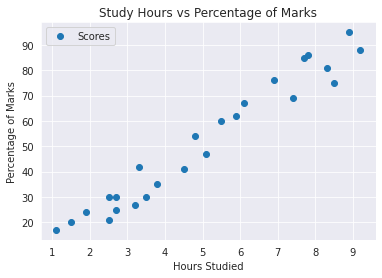

In [70]:
# Plotting the distribution of scores
sns.set_style('darkgrid')
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Study Hours vs Percentage of Marks')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage of Marks')  
plt.show()

**Preparing the data**

Divide the data into "attributes" and "labels"

In [71]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Split this data into training and test sets

In [72]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

**Training the algorithm**

In [73]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training completed sucessfully.")

Training completed sucessfully.


**Regression Plot**

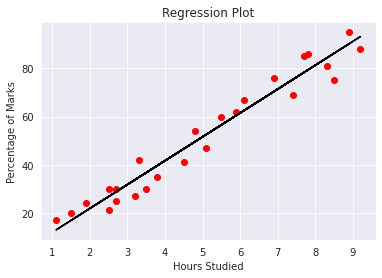

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [74]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.title("Regression Plot")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage of Marks")
plt.scatter(X, y,color='red')
plt.plot(X, line,color='black');
plt.show()
print(data.corr())

**Making the predictions**

In [75]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [76]:
prediction=pd.DataFrame({"Study Hours": [i[0] for i in X_test], "Predicted Marks": [k for k in y_pred]})
prediction

,Study Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


**Comparing the Predicted Marks with the Actual Marks**

In [77]:
df = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_pred})  
df 

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Visually Comparing the Predicted Marks with the Actual Marks**

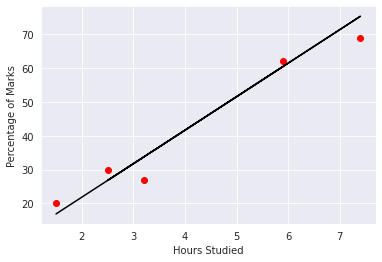

In [78]:
plt.xlabel("Hours Studied")
plt.ylabel("Percentage of Marks")
plt.scatter(x=X_test,y=y_test,color='red')
plt.plot(X_test,y_pred,color='black')
plt.show()

**Predicted Score if a student studies for 9.25 hrs/day**

In [79]:
hours= 9.25
test=np.array([hours])
test=test.reshape(-1,1)
ans = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(ans[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


**Evaluating the model**

In [80]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
